In [1]:
import sys
import importlib
import pandas as pd

In [9]:
from theguardian_api.query_mongodb import MongoDb

In [3]:
import app_config

In [4]:
mongodb = MongoDb()

In [10]:
df = mongodb.get_df_from_db(collection_name=app_config.collection_name)

In [12]:
df.head(10)

,_id,page,article_headline,article_timestamp,article_url,article_tag
0,60f2b90d9c870ace67ffb572,https://www.theguardian.com/world/coronavirus-...,"Hope, horror and Covid-19: my 23 years as the ...",2021-07-17T11:00:02+0000,https://www.theguardian.com/society/2021/jul/1...,society
1,60f2b90d9c870ace67ffb573,https://www.theguardian.com/world/coronavirus-...,Biden says Covid-19 misinformation is 'killing...,2021-07-17T10:50:11+0000,https://www.theguardian.com/technology/video/2...,technology
2,60f2b90d9c870ace67ffb574,https://www.theguardian.com/world/coronavirus-...,Covid live news: Beta variant may evade AstraZ...,2021-07-17T10:13:29+0000,https://www.theguardian.com/world/live/2021/ju...,world
3,60f2b90d9c870ace67ffb575,https://www.theguardian.com/world/coronavirus-...,Johnson to press ahead with lifting Covid rule...,2021-07-17T09:00:57+0000,https://www.theguardian.com/politics/2021/jul/...,politics
4,60f2b90e9c870ace67ffb576,https://www.theguardian.com/world/all,"Hope, horror and Covid-19: my 23 years as the ...",2021-07-17T11:00:02+0000,https://www.theguardian.com/society/2021/jul/1...,society
5,60f2b90e9c870ace67ffb577,https://www.theguardian.com/world/coronavirus-...,Unvaccinated could be breeding ground for Covi...,2021-07-17T09:00:56+0000,https://www.theguardian.com/world/2021/jul/17/...,world
6,60f2b90e9c870ace67ffb578,https://www.theguardian.com/world/all,Covid live news: Beta variant may evade AstraZ...,2021-07-17T10:50:11+0000,https://www.theguardian.com/world/live/2021/ju...,world
7,60f2b90e9c870ace67ffb579,https://www.theguardian.com/uk-news/all,Covid live news: Beta variant may evade AstraZ...,2021-07-17T10:50:11+0000,https://www.theguardian.com/world/live/2021/ju...,world
8,60f2b90e9c870ace67ffb57a,https://www.theguardian.com/global-development...,"Hope, horror and Covid-19: my 23 years as the ...",2021-07-17T11:00:02+0000,https://www.theguardian.com/society/2021/jul/1...,society
9,60f2b90e9c870ace67ffb57b,https://www.theguardian.com/science/all,Tough new rules to combat outbreak as more tha...,2021-07-17T08:58:57+0000,https://www.theguardian.com/australia-news/liv...,australia-news


In [13]:
df.isnull().sum()

_id                  0
page                 0
article_headline     0
article_timestamp    0
article_url          0
article_tag          0
dtype: int64

In [14]:
df.dtypes

_id                  object
page                 object
article_headline     object
article_timestamp    object
article_url          object
article_tag          object
dtype: object

In [15]:
df.count()

_id                  20814
page                 20814
article_headline     20814
article_timestamp    20814
article_url          20814
article_tag          20814
dtype: int64

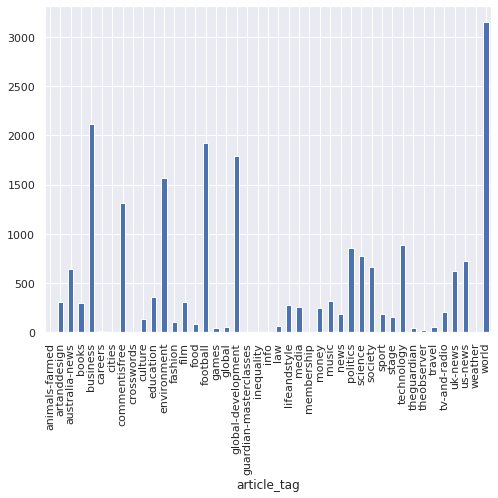

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('article_tag')['article_headline'].count().plot.bar(ylim=0)
plt.show()

Text(0.5, 1.0, 'WordCloud ')

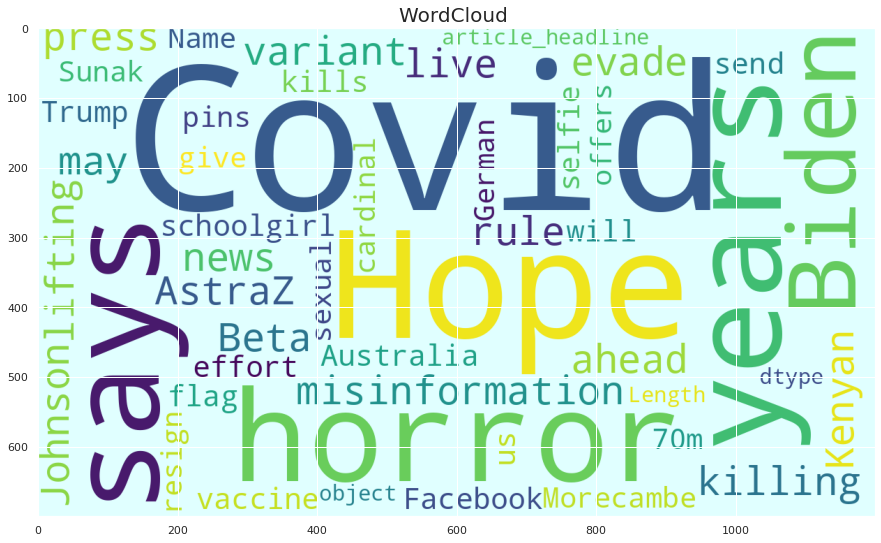

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(df['article_headline']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)